In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2022-04-01 10:43:05.353708: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-01 10:43:05.353742: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = yf.download('INFY').reset_index()

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-03-11,0.583984,0.781250,0.583984,0.732422,0.515399,172512000
1,1999-03-12,0.734375,0.761719,0.671875,0.728516,0.512650,39897600
2,1999-03-15,0.730469,0.730469,0.658203,0.662109,0.465920,12672000
3,1999-03-16,0.667969,0.691406,0.656250,0.656250,0.461797,9984000
4,1999-03-17,0.656250,0.699219,0.652344,0.660156,0.464546,15449600
...,...,...,...,...,...,...,...
5799,2022-03-25,24.600000,24.750000,24.510000,24.730000,24.730000,3365400
5800,2022-03-28,24.730000,24.770000,24.520000,24.719999,24.719999,2834400
5801,2022-03-29,24.910000,25.120001,24.809999,25.110001,25.110001,3817200
5802,2022-03-30,24.820000,25.170000,24.820000,24.969999,24.969999,6945500


In [4]:
df1=df.reset_index()['Close']
df1.index = df['Date']

In [5]:
df1

Date
1999-03-11     0.732422
1999-03-12     0.728516
1999-03-15     0.662109
1999-03-16     0.656250
1999-03-17     0.660156
                ...    
2022-03-25    24.730000
2022-03-28    24.719999
2022-03-29    25.110001
2022-03-30    24.969999
2022-03-31    24.889999
Name: Close, Length: 5804, dtype: float64

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
print(len(df1))

5804


In [8]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [9]:
training_size,test_size

(3772, 2032)

In [10]:
train_data

array([[0.00420027],
       [0.00404755],
       [0.00145099],
       ...,
       [0.28113391],
       [0.28352882],
       [0.2706256 ]])

In [11]:
test_data

array([[0.26710655],
       [0.26700879],
       [0.24931572],
       ...,
       [0.95738025],
       [0.9519061 ],
       [0.94877805]])

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        #print(a) ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(3671, 100)
(3671,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(1931, 100)
(1931,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
X_train.shape[1]

100

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


2022-04-01 10:43:27.444670: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-01 10:43:27.444740: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-01 10:43:27.444783: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PrincePat3l): /proc/driver/nvidia/version does not exist
2022-04-01 10:43:27.445236: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
58/58 [==============================] - 20s 225ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 2/10
58/58 [==============================] - 11s 194ms/step - loss: 2.8649e-04 - val_loss: 0.0018
Epoch 3/10
58/58 [==============================] - 11s 195ms/step - loss: 2.6252e-04 - val_loss: 8.1216e-04
Epoch 4/10
58/58 [==============================] - 12s 213ms/step - loss: 2.3197e-04 - val_loss: 0.0013
Epoch 5/10
58/58 [==============================] - 13s 219ms/step - loss: 2.1855e-04 - val_loss: 0.0011
Epoch 6/10
58/58 [==============================] - 12s 214ms/step - loss: 1.9883e-04 - val_loss: 7.1157e-04
Epoch 7/10
58/58 [==============================] - 13s 222ms/step - loss: 1.9158e-04 - val_loss: 0.0016
Epoch 8/10
58/58 [==============================] - 13s 217ms/step - loss: 1.7508e-04 - val_loss: 0.0016
Epoch 9/10
58/58 [==============================] - 13s 224ms/step - loss: 1.9452e-04 - val_loss: 0.0011
Epoch 10/10
58/58 [==============================] 

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
X_train.shape

(3671, 100, 1)

In [24]:
X_test.shape

(1931, 100, 1)

In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4.974205353373268

In [27]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

10.793237738371277

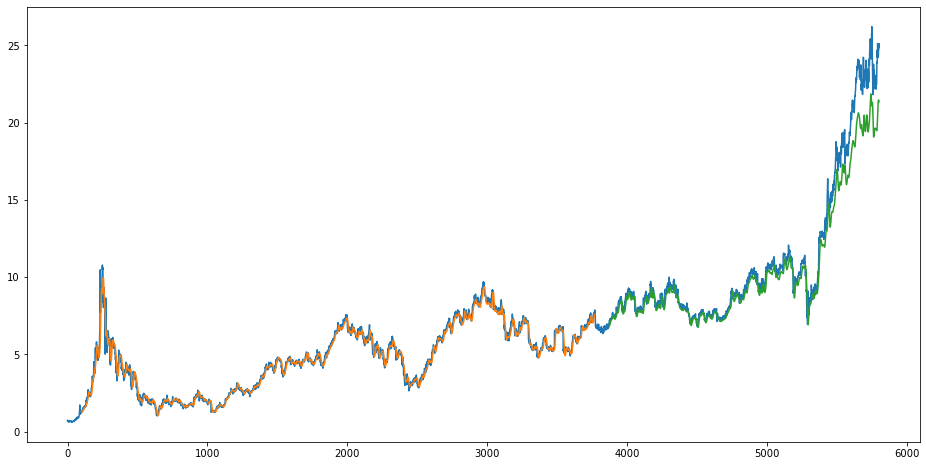

In [28]:
### Plotting 
# shift train predictions for plotting
plt.figure(figsize=(16,8))
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [29]:
len(test_data)

2032

In [30]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input=list(x_input)
#print(temp_input)
#print("111111111111111111111------------")
temp_input=temp_input[0].tolist()
#print(temp_input)

In [32]:
#temp_input

In [33]:
# prediction for next 180 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<180):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8070618]
101
1 day input [0.88660796 0.87331372 0.88269795 0.90224829 0.89951118 0.91515151
 0.90381228 0.90029321 0.89794719 0.86588465 0.87057669 0.85962854
 0.84359727 0.86001956 0.85845549 0.85298142 0.89208211 0.87018567
 0.84555227 0.8772238  0.89208211 0.88465296 0.88230693 0.85962854
 0.87057669 0.88504397 0.91827957 0.91554253 0.90185728 0.92258059
 0.93470186 0.94252195 0.96598237 0.96480933 0.96793738 0.96911042
 0.96520034 0.96324534 0.95738025 0.92570864 0.91827957 0.92179863
 0.94408601 0.95386118 0.98240466 0.97653958 1.         0.97302051
 0.93235576 0.90146626 0.89090906 0.87253176 0.85454541 0.85102634
 0.82834795 0.86158355 0.89716516 0.89521016 0.90498533 0.86549363
 0.87057669 0.8541544  0.87057669 0.89090906 0.87253176 0.8463343
 0.84320625 0.87057669 0.86862168 0.85259041 0.85571846 0.87683279
 0.86392957 0.84516126 0.86862168 0.85376338 0.8420332  0.85884651
 0.85610947 0.85376338 0.85845549 0.88778101 0.91006838 0.90772236
 0.91436948 0.94095796 0.92140762 0

9 day output [[0.6048244]]
10 day input [0.86588465 0.87057669 0.85962854 0.84359727 0.86001956 0.85845549
 0.85298142 0.89208211 0.87018567 0.84555227 0.8772238  0.89208211
 0.88465296 0.88230693 0.85962854 0.87057669 0.88504397 0.91827957
 0.91554253 0.90185728 0.92258059 0.93470186 0.94252195 0.96598237
 0.96480933 0.96793738 0.96911042 0.96520034 0.96324534 0.95738025
 0.92570864 0.91827957 0.92179863 0.94408601 0.95386118 0.98240466
 0.97653958 1.         0.97302051 0.93235576 0.90146626 0.89090906
 0.87253176 0.85454541 0.85102634 0.82834795 0.86158355 0.89716516
 0.89521016 0.90498533 0.86549363 0.87057669 0.8541544  0.87057669
 0.89090906 0.87253176 0.8463343  0.84320625 0.87057669 0.86862168
 0.85259041 0.85571846 0.87683279 0.86392957 0.84516126 0.86862168
 0.85376338 0.8420332  0.85884651 0.85610947 0.85376338 0.85845549
 0.88778101 0.91006838 0.90772236 0.91436948 0.94095796 0.92140762
 0.95738025 0.93313779 0.95464321 0.92218958 0.94486804 0.92609966
 0.94017593 0.94252195

18 day output [[0.40529266]]
19 day input [0.84555227 0.8772238  0.89208211 0.88465296 0.88230693 0.85962854
 0.87057669 0.88504397 0.91827957 0.91554253 0.90185728 0.92258059
 0.93470186 0.94252195 0.96598237 0.96480933 0.96793738 0.96911042
 0.96520034 0.96324534 0.95738025 0.92570864 0.91827957 0.92179863
 0.94408601 0.95386118 0.98240466 0.97653958 1.         0.97302051
 0.93235576 0.90146626 0.89090906 0.87253176 0.85454541 0.85102634
 0.82834795 0.86158355 0.89716516 0.89521016 0.90498533 0.86549363
 0.87057669 0.8541544  0.87057669 0.89090906 0.87253176 0.8463343
 0.84320625 0.87057669 0.86862168 0.85259041 0.85571846 0.87683279
 0.86392957 0.84516126 0.86862168 0.85376338 0.8420332  0.85884651
 0.85610947 0.85376338 0.85845549 0.88778101 0.91006838 0.90772236
 0.91436948 0.94095796 0.92140762 0.95738025 0.93313779 0.95464321
 0.92218958 0.94486804 0.92609966 0.94017593 0.94252195 0.94213093
 0.95738025 0.9519061  0.94877805 0.80706179 0.79968715 0.7858507
 0.76652014 0.74310213

26 day output [[0.31546912]]
27 day input [0.91827957 0.91554253 0.90185728 0.92258059 0.93470186 0.94252195
 0.96598237 0.96480933 0.96793738 0.96911042 0.96520034 0.96324534
 0.95738025 0.92570864 0.91827957 0.92179863 0.94408601 0.95386118
 0.98240466 0.97653958 1.         0.97302051 0.93235576 0.90146626
 0.89090906 0.87253176 0.85454541 0.85102634 0.82834795 0.86158355
 0.89716516 0.89521016 0.90498533 0.86549363 0.87057669 0.8541544
 0.87057669 0.89090906 0.87253176 0.8463343  0.84320625 0.87057669
 0.86862168 0.85259041 0.85571846 0.87683279 0.86392957 0.84516126
 0.86862168 0.85376338 0.8420332  0.85884651 0.85610947 0.85376338
 0.85845549 0.88778101 0.91006838 0.90772236 0.91436948 0.94095796
 0.92140762 0.95738025 0.93313779 0.95464321 0.92218958 0.94486804
 0.92609966 0.94017593 0.94252195 0.94213093 0.95738025 0.9519061
 0.94877805 0.80706179 0.79968715 0.7858507  0.76652014 0.74310213
 0.71698016 0.68931538 0.66100025 0.63268405 0.60482442 0.57773888
 0.5516479  0.52670681

34 day output [[0.27781457]]
35 day input [0.96793738 0.96911042 0.96520034 0.96324534 0.95738025 0.92570864
 0.91827957 0.92179863 0.94408601 0.95386118 0.98240466 0.97653958
 1.         0.97302051 0.93235576 0.90146626 0.89090906 0.87253176
 0.85454541 0.85102634 0.82834795 0.86158355 0.89716516 0.89521016
 0.90498533 0.86549363 0.87057669 0.8541544  0.87057669 0.89090906
 0.87253176 0.8463343  0.84320625 0.87057669 0.86862168 0.85259041
 0.85571846 0.87683279 0.86392957 0.84516126 0.86862168 0.85376338
 0.8420332  0.85884651 0.85610947 0.85376338 0.85845549 0.88778101
 0.91006838 0.90772236 0.91436948 0.94095796 0.92140762 0.95738025
 0.93313779 0.95464321 0.92218958 0.94486804 0.92609966 0.94017593
 0.94252195 0.94213093 0.95738025 0.9519061  0.94877805 0.80706179
 0.79968715 0.7858507  0.76652014 0.74310213 0.71698016 0.68931538
 0.66100025 0.63268405 0.60482442 0.57773888 0.5516479  0.52670681
 0.50302482 0.48067817 0.45971641 0.44016528 0.42202926 0.40529266
 0.38992342 0.375873

43 day output [[0.2610753]]
44 day input [0.95386118 0.98240466 0.97653958 1.         0.97302051 0.93235576
 0.90146626 0.89090906 0.87253176 0.85454541 0.85102634 0.82834795
 0.86158355 0.89716516 0.89521016 0.90498533 0.86549363 0.87057669
 0.8541544  0.87057669 0.89090906 0.87253176 0.8463343  0.84320625
 0.87057669 0.86862168 0.85259041 0.85571846 0.87683279 0.86392957
 0.84516126 0.86862168 0.85376338 0.8420332  0.85884651 0.85610947
 0.85376338 0.85845549 0.88778101 0.91006838 0.90772236 0.91436948
 0.94095796 0.92140762 0.95738025 0.93313779 0.95464321 0.92218958
 0.94486804 0.92609966 0.94017593 0.94252195 0.94213093 0.95738025
 0.9519061  0.94877805 0.80706179 0.79968715 0.7858507  0.76652014
 0.74310213 0.71698016 0.68931538 0.66100025 0.63268405 0.60482442
 0.57773888 0.5516479  0.52670681 0.50302482 0.48067817 0.45971641
 0.44016528 0.42202926 0.40529266 0.38992342 0.37587354 0.36308342
 0.35148451 0.34100226 0.33155838 0.32307363 0.31546912 0.30866775
 0.3025955  0.2971818

52 day output [[0.25225574]]
53 day input [0.85454541 0.85102634 0.82834795 0.86158355 0.89716516 0.89521016
 0.90498533 0.86549363 0.87057669 0.8541544  0.87057669 0.89090906
 0.87253176 0.8463343  0.84320625 0.87057669 0.86862168 0.85259041
 0.85571846 0.87683279 0.86392957 0.84516126 0.86862168 0.85376338
 0.8420332  0.85884651 0.85610947 0.85376338 0.85845549 0.88778101
 0.91006838 0.90772236 0.91436948 0.94095796 0.92140762 0.95738025
 0.93313779 0.95464321 0.92218958 0.94486804 0.92609966 0.94017593
 0.94252195 0.94213093 0.95738025 0.9519061  0.94877805 0.80706179
 0.79968715 0.7858507  0.76652014 0.74310213 0.71698016 0.68931538
 0.66100025 0.63268405 0.60482442 0.57773888 0.5516479  0.52670681
 0.50302482 0.48067817 0.45971641 0.44016528 0.42202926 0.40529266
 0.38992342 0.37587354 0.36308342 0.35148451 0.34100226 0.33155838
 0.32307363 0.31546912 0.30866775 0.3025955  0.29718181 0.29236007
 0.28806794 0.28424782 0.28084636 0.27781457 0.27510774 0.27268571
 0.27051169 0.268553

61 day output [[0.24506189]]
62 day input [0.8541544  0.87057669 0.89090906 0.87253176 0.8463343  0.84320625
 0.87057669 0.86862168 0.85259041 0.85571846 0.87683279 0.86392957
 0.84516126 0.86862168 0.85376338 0.8420332  0.85884651 0.85610947
 0.85376338 0.85845549 0.88778101 0.91006838 0.90772236 0.91436948
 0.94095796 0.92140762 0.95738025 0.93313779 0.95464321 0.92218958
 0.94486804 0.92609966 0.94017593 0.94252195 0.94213093 0.95738025
 0.9519061  0.94877805 0.80706179 0.79968715 0.7858507  0.76652014
 0.74310213 0.71698016 0.68931538 0.66100025 0.63268405 0.60482442
 0.57773888 0.5516479  0.52670681 0.50302482 0.48067817 0.45971641
 0.44016528 0.42202926 0.40529266 0.38992342 0.37587354 0.36308342
 0.35148451 0.34100226 0.33155838 0.32307363 0.31546912 0.30866775
 0.3025955  0.29718181 0.29236007 0.28806794 0.28424782 0.28084636
 0.27781457 0.27510774 0.27268571 0.27051169 0.26855308 0.26678061
 0.26516816 0.26369289 0.26233447 0.26107529 0.25989985 0.25879493
 0.25774899 0.256752

70 day output [[0.23838173]]
71 day input [0.85571846 0.87683279 0.86392957 0.84516126 0.86862168 0.85376338
 0.8420332  0.85884651 0.85610947 0.85376338 0.85845549 0.88778101
 0.91006838 0.90772236 0.91436948 0.94095796 0.92140762 0.95738025
 0.93313779 0.95464321 0.92218958 0.94486804 0.92609966 0.94017593
 0.94252195 0.94213093 0.95738025 0.9519061  0.94877805 0.80706179
 0.79968715 0.7858507  0.76652014 0.74310213 0.71698016 0.68931538
 0.66100025 0.63268405 0.60482442 0.57773888 0.5516479  0.52670681
 0.50302482 0.48067817 0.45971641 0.44016528 0.42202926 0.40529266
 0.38992342 0.37587354 0.36308342 0.35148451 0.34100226 0.33155838
 0.32307363 0.31546912 0.30866775 0.3025955  0.29718181 0.29236007
 0.28806794 0.28424782 0.28084636 0.27781457 0.27510774 0.27268571
 0.27051169 0.26855308 0.26678061 0.26516816 0.26369289 0.26233447
 0.26107529 0.25989985 0.25879493 0.25774899 0.25675228 0.25579625
 0.25487405 0.25397965 0.25310823 0.25225574 0.25141877 0.25059474
 0.24978158 0.248977

79 day output [[0.2322549]]
80 day input [0.85376338 0.85845549 0.88778101 0.91006838 0.90772236 0.91436948
 0.94095796 0.92140762 0.95738025 0.93313779 0.95464321 0.92218958
 0.94486804 0.92609966 0.94017593 0.94252195 0.94213093 0.95738025
 0.9519061  0.94877805 0.80706179 0.79968715 0.7858507  0.76652014
 0.74310213 0.71698016 0.68931538 0.66100025 0.63268405 0.60482442
 0.57773888 0.5516479  0.52670681 0.50302482 0.48067817 0.45971641
 0.44016528 0.42202926 0.40529266 0.38992342 0.37587354 0.36308342
 0.35148451 0.34100226 0.33155838 0.32307363 0.31546912 0.30866775
 0.3025955  0.29718181 0.29236007 0.28806794 0.28424782 0.28084636
 0.27781457 0.27510774 0.27268571 0.27051169 0.26855308 0.26678061
 0.26516816 0.26369289 0.26233447 0.26107529 0.25989985 0.25879493
 0.25774899 0.25675228 0.25579625 0.25487405 0.25397965 0.25310823
 0.25225574 0.25141877 0.25059474 0.24978158 0.24897757 0.24818151
 0.2473924  0.24660976 0.24583299 0.24506189 0.24429624 0.24353625
 0.2427818  0.242033 

88 day output [[0.2267522]]
89 day input [0.93313779 0.95464321 0.92218958 0.94486804 0.92609966 0.94017593
 0.94252195 0.94213093 0.95738025 0.9519061  0.94877805 0.80706179
 0.79968715 0.7858507  0.76652014 0.74310213 0.71698016 0.68931538
 0.66100025 0.63268405 0.60482442 0.57773888 0.5516479  0.52670681
 0.50302482 0.48067817 0.45971641 0.44016528 0.42202926 0.40529266
 0.38992342 0.37587354 0.36308342 0.35148451 0.34100226 0.33155838
 0.32307363 0.31546912 0.30866775 0.3025955  0.29718181 0.29236007
 0.28806794 0.28424782 0.28084636 0.27781457 0.27510774 0.27268571
 0.27051169 0.26855308 0.26678061 0.26516816 0.26369289 0.26233447
 0.26107529 0.25989985 0.25879493 0.25774899 0.25675228 0.25579625
 0.25487405 0.25397965 0.25310823 0.25225574 0.25141877 0.25059474
 0.24978158 0.24897757 0.24818151 0.2473924  0.24660976 0.24583299
 0.24506189 0.24429624 0.24353625 0.2427818  0.242033   0.2412902
 0.24055344 0.23982298 0.23909897 0.23838173 0.23767135 0.2369681
 0.2362721  0.23558347 

97 day output [[0.2218435]]
98 day input [0.9519061  0.94877805 0.80706179 0.79968715 0.7858507  0.76652014
 0.74310213 0.71698016 0.68931538 0.66100025 0.63268405 0.60482442
 0.57773888 0.5516479  0.52670681 0.50302482 0.48067817 0.45971641
 0.44016528 0.42202926 0.40529266 0.38992342 0.37587354 0.36308342
 0.35148451 0.34100226 0.33155838 0.32307363 0.31546912 0.30866775
 0.3025955  0.29718181 0.29236007 0.28806794 0.28424782 0.28084636
 0.27781457 0.27510774 0.27268571 0.27051169 0.26855308 0.26678061
 0.26516816 0.26369289 0.26233447 0.26107529 0.25989985 0.25879493
 0.25774899 0.25675228 0.25579625 0.25487405 0.25397965 0.25310823
 0.25225574 0.25141877 0.25059474 0.24978158 0.24897757 0.24818151
 0.2473924  0.24660976 0.24583299 0.24506189 0.24429624 0.24353625
 0.2427818  0.242033   0.2412902  0.24055344 0.23982298 0.23909897
 0.23838173 0.23767135 0.2369681  0.2362721  0.23558347 0.23490237
 0.23422886 0.23356311 0.23290507 0.23225489 0.23161252 0.23097795
 0.23035118 0.2297322

106 day output [[0.21745428]]
107 day input [0.66100025 0.63268405 0.60482442 0.57773888 0.5516479  0.52670681
 0.50302482 0.48067817 0.45971641 0.44016528 0.42202926 0.40529266
 0.38992342 0.37587354 0.36308342 0.35148451 0.34100226 0.33155838
 0.32307363 0.31546912 0.30866775 0.3025955  0.29718181 0.29236007
 0.28806794 0.28424782 0.28084636 0.27781457 0.27510774 0.27268571
 0.27051169 0.26855308 0.26678061 0.26516816 0.26369289 0.26233447
 0.26107529 0.25989985 0.25879493 0.25774899 0.25675228 0.25579625
 0.25487405 0.25397965 0.25310823 0.25225574 0.25141877 0.25059474
 0.24978158 0.24897757 0.24818151 0.2473924  0.24660976 0.24583299
 0.24506189 0.24429624 0.24353625 0.2427818  0.242033   0.2412902
 0.24055344 0.23982298 0.23909897 0.23838173 0.23767135 0.2369681
 0.2362721  0.23558347 0.23490237 0.23422886 0.23356311 0.23290507
 0.23225489 0.23161252 0.23097795 0.23035118 0.22973222 0.22912095
 0.22851746 0.22792155 0.22733314 0.22675221 0.22617869 0.22561236
 0.22505334 0.224501

115 day output [[0.2135085]]
116 day input [0.44016528 0.42202926 0.40529266 0.38992342 0.37587354 0.36308342
 0.35148451 0.34100226 0.33155838 0.32307363 0.31546912 0.30866775
 0.3025955  0.29718181 0.29236007 0.28806794 0.28424782 0.28084636
 0.27781457 0.27510774 0.27268571 0.27051169 0.26855308 0.26678061
 0.26516816 0.26369289 0.26233447 0.26107529 0.25989985 0.25879493
 0.25774899 0.25675228 0.25579625 0.25487405 0.25397965 0.25310823
 0.25225574 0.25141877 0.25059474 0.24978158 0.24897757 0.24818151
 0.2473924  0.24660976 0.24583299 0.24506189 0.24429624 0.24353625
 0.2427818  0.242033   0.2412902  0.24055344 0.23982298 0.23909897
 0.23838173 0.23767135 0.2369681  0.2362721  0.23558347 0.23490237
 0.23422886 0.23356311 0.23290507 0.23225489 0.23161252 0.23097795
 0.23035118 0.22973222 0.22912095 0.22851746 0.22792155 0.22733314
 0.22675221 0.22617869 0.22561236 0.22505334 0.22450131 0.22395624
 0.22341804 0.22288659 0.22236176 0.2218435  0.22133164 0.22082603
 0.22032662 0.21983

124 day output [[0.20994182]]
125 day input [0.32307363 0.31546912 0.30866775 0.3025955  0.29718181 0.29236007
 0.28806794 0.28424782 0.28084636 0.27781457 0.27510774 0.27268571
 0.27051169 0.26855308 0.26678061 0.26516816 0.26369289 0.26233447
 0.26107529 0.25989985 0.25879493 0.25774899 0.25675228 0.25579625
 0.25487405 0.25397965 0.25310823 0.25225574 0.25141877 0.25059474
 0.24978158 0.24897757 0.24818151 0.2473924  0.24660976 0.24583299
 0.24506189 0.24429624 0.24353625 0.2427818  0.242033   0.2412902
 0.24055344 0.23982298 0.23909897 0.23838173 0.23767135 0.2369681
 0.2362721  0.23558347 0.23490237 0.23422886 0.23356311 0.23290507
 0.23225489 0.23161252 0.23097795 0.23035118 0.22973222 0.22912095
 0.22851746 0.22792155 0.22733314 0.22675221 0.22617869 0.22561236
 0.22505334 0.22450131 0.22395624 0.22341804 0.22288659 0.22236176
 0.2218435  0.22133164 0.22082603 0.22032662 0.21983334 0.21934597
 0.21886452 0.2183888  0.21791872 0.21745428 0.21699525 0.21654163
 0.21609315 0.215649

133 day output [[0.20670253]]
134 day input [0.27781457 0.27510774 0.27268571 0.27051169 0.26855308 0.26678061
 0.26516816 0.26369289 0.26233447 0.26107529 0.25989985 0.25879493
 0.25774899 0.25675228 0.25579625 0.25487405 0.25397965 0.25310823
 0.25225574 0.25141877 0.25059474 0.24978158 0.24897757 0.24818151
 0.2473924  0.24660976 0.24583299 0.24506189 0.24429624 0.24353625
 0.2427818  0.242033   0.2412902  0.24055344 0.23982298 0.23909897
 0.23838173 0.23767135 0.2369681  0.2362721  0.23558347 0.23490237
 0.23422886 0.23356311 0.23290507 0.23225489 0.23161252 0.23097795
 0.23035118 0.22973222 0.22912095 0.22851746 0.22792155 0.22733314
 0.22675221 0.22617869 0.22561236 0.22505334 0.22450131 0.22395624
 0.22341804 0.22288659 0.22236176 0.2218435  0.22133164 0.22082603
 0.22032662 0.21983334 0.21934597 0.21886452 0.2183888  0.21791872
 0.21745428 0.21699525 0.21654163 0.21609315 0.21564995 0.21521185
 0.21477871 0.21435046 0.21392708 0.2135085  0.21309447 0.21268511
 0.21228023 0.2118

142 day output [[0.20374848]]
143 day input [0.26107529 0.25989985 0.25879493 0.25774899 0.25675228 0.25579625
 0.25487405 0.25397965 0.25310823 0.25225574 0.25141877 0.25059474
 0.24978158 0.24897757 0.24818151 0.2473924  0.24660976 0.24583299
 0.24506189 0.24429624 0.24353625 0.2427818  0.242033   0.2412902
 0.24055344 0.23982298 0.23909897 0.23838173 0.23767135 0.2369681
 0.2362721  0.23558347 0.23490237 0.23422886 0.23356311 0.23290507
 0.23225489 0.23161252 0.23097795 0.23035118 0.22973222 0.22912095
 0.22851746 0.22792155 0.22733314 0.22675221 0.22617869 0.22561236
 0.22505334 0.22450131 0.22395624 0.22341804 0.22288659 0.22236176
 0.2218435  0.22133164 0.22082603 0.22032662 0.21983334 0.21934597
 0.21886452 0.2183888  0.21791872 0.21745428 0.21699525 0.21654163
 0.21609315 0.21564995 0.21521185 0.21477871 0.21435046 0.21392708
 0.2135085  0.21309447 0.21268511 0.21228023 0.2118798  0.21148379
 0.21109198 0.21070446 0.21032113 0.20994182 0.20956661 0.20919533
 0.20882791 0.208464

151 day output [[0.20104499]]
152 day input [0.25225574 0.25141877 0.25059474 0.24978158 0.24897757 0.24818151
 0.2473924  0.24660976 0.24583299 0.24506189 0.24429624 0.24353625
 0.2427818  0.242033   0.2412902  0.24055344 0.23982298 0.23909897
 0.23838173 0.23767135 0.2369681  0.2362721  0.23558347 0.23490237
 0.23422886 0.23356311 0.23290507 0.23225489 0.23161252 0.23097795
 0.23035118 0.22973222 0.22912095 0.22851746 0.22792155 0.22733314
 0.22675221 0.22617869 0.22561236 0.22505334 0.22450131 0.22395624
 0.22341804 0.22288659 0.22236176 0.2218435  0.22133164 0.22082603
 0.22032662 0.21983334 0.21934597 0.21886452 0.2183888  0.21791872
 0.21745428 0.21699525 0.21654163 0.21609315 0.21564995 0.21521185
 0.21477871 0.21435046 0.21392708 0.2135085  0.21309447 0.21268511
 0.21228023 0.2118798  0.21148379 0.21109198 0.21070446 0.21032113
 0.20994182 0.20956661 0.20919533 0.20882791 0.20846444 0.20810467
 0.2077487  0.20739639 0.2070477  0.20670253 0.20636092 0.20602278
 0.20568807 0.2053

160 day output [[0.19856286]]
161 day input [0.24506189 0.24429624 0.24353625 0.2427818  0.242033   0.2412902
 0.24055344 0.23982298 0.23909897 0.23838173 0.23767135 0.2369681
 0.2362721  0.23558347 0.23490237 0.23422886 0.23356311 0.23290507
 0.23225489 0.23161252 0.23097795 0.23035118 0.22973222 0.22912095
 0.22851746 0.22792155 0.22733314 0.22675221 0.22617869 0.22561236
 0.22505334 0.22450131 0.22395624 0.22341804 0.22288659 0.22236176
 0.2218435  0.22133164 0.22082603 0.22032662 0.21983334 0.21934597
 0.21886452 0.2183888  0.21791872 0.21745428 0.21699525 0.21654163
 0.21609315 0.21564995 0.21521185 0.21477871 0.21435046 0.21392708
 0.2135085  0.21309447 0.21268511 0.21228023 0.2118798  0.21148379
 0.21109198 0.21070446 0.21032113 0.20994182 0.20956661 0.20919533
 0.20882791 0.20846444 0.20810467 0.2077487  0.20739639 0.2070477
 0.20670253 0.20636092 0.20602278 0.20568807 0.20535661 0.20502858
 0.20470375 0.20438214 0.20406377 0.20374848 0.20343629 0.20312721
 0.20282103 0.2025178

169 day output [[0.19627754]]
170 day input [0.23838173 0.23767135 0.2369681  0.2362721  0.23558347 0.23490237
 0.23422886 0.23356311 0.23290507 0.23225489 0.23161252 0.23097795
 0.23035118 0.22973222 0.22912095 0.22851746 0.22792155 0.22733314
 0.22675221 0.22617869 0.22561236 0.22505334 0.22450131 0.22395624
 0.22341804 0.22288659 0.22236176 0.2218435  0.22133164 0.22082603
 0.22032662 0.21983334 0.21934597 0.21886452 0.2183888  0.21791872
 0.21745428 0.21699525 0.21654163 0.21609315 0.21564995 0.21521185
 0.21477871 0.21435046 0.21392708 0.2135085  0.21309447 0.21268511
 0.21228023 0.2118798  0.21148379 0.21109198 0.21070446 0.21032113
 0.20994182 0.20956661 0.20919533 0.20882791 0.20846444 0.20810467
 0.2077487  0.20739639 0.2070477  0.20670253 0.20636092 0.20602278
 0.20568807 0.20535661 0.20502858 0.20470375 0.20438214 0.20406377
 0.20374848 0.20343629 0.20312721 0.20282103 0.20251785 0.20221753
 0.20192018 0.20162565 0.20133393 0.20104499 0.20075873 0.20047519
 0.2001943  0.1999

178 day output [[0.19416799]]
179 day input [0.23225489 0.23161252 0.23097795 0.23035118 0.22973222 0.22912095
 0.22851746 0.22792155 0.22733314 0.22675221 0.22617869 0.22561236
 0.22505334 0.22450131 0.22395624 0.22341804 0.22288659 0.22236176
 0.2218435  0.22133164 0.22082603 0.22032662 0.21983334 0.21934597
 0.21886452 0.2183888  0.21791872 0.21745428 0.21699525 0.21654163
 0.21609315 0.21564995 0.21521185 0.21477871 0.21435046 0.21392708
 0.2135085  0.21309447 0.21268511 0.21228023 0.2118798  0.21148379
 0.21109198 0.21070446 0.21032113 0.20994182 0.20956661 0.20919533
 0.20882791 0.20846444 0.20810467 0.2077487  0.20739639 0.2070477
 0.20670253 0.20636092 0.20602278 0.20568807 0.20535661 0.20502858
 0.20470375 0.20438214 0.20406377 0.20374848 0.20343629 0.20312721
 0.20282103 0.20251785 0.20221753 0.20192018 0.20162565 0.20133393
 0.20104499 0.20075873 0.20047519 0.2001943  0.19991599 0.19964036
 0.19936723 0.19909663 0.19882847 0.19856286 0.19829963 0.19803882
 0.19778033 0.19752

In [34]:
day_new=np.arange(1,101)
day_pred=np.arange(101,281)

In [35]:
import matplotlib.pyplot as plt

In [36]:
len(df1)

5804

180


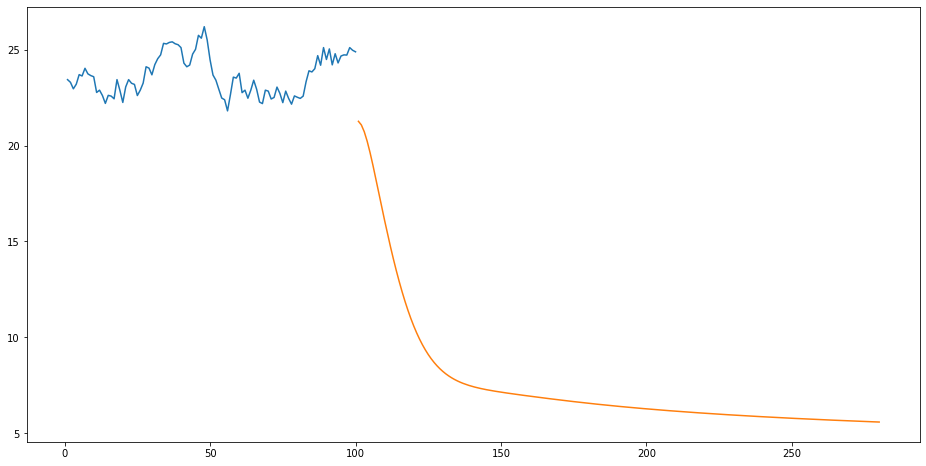

In [37]:
plt.figure(figsize=(16,8))
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(len(lst_output))

In [38]:
from datetime import datetime

#date = pd.date_range(datetime.today(), periods = 30).tolist()
datelist = pd.date_range(datetime.today(), periods=180).tolist()
datelist[0]


Timestamp('2022-04-01 10:46:25.554966', freq='D')

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


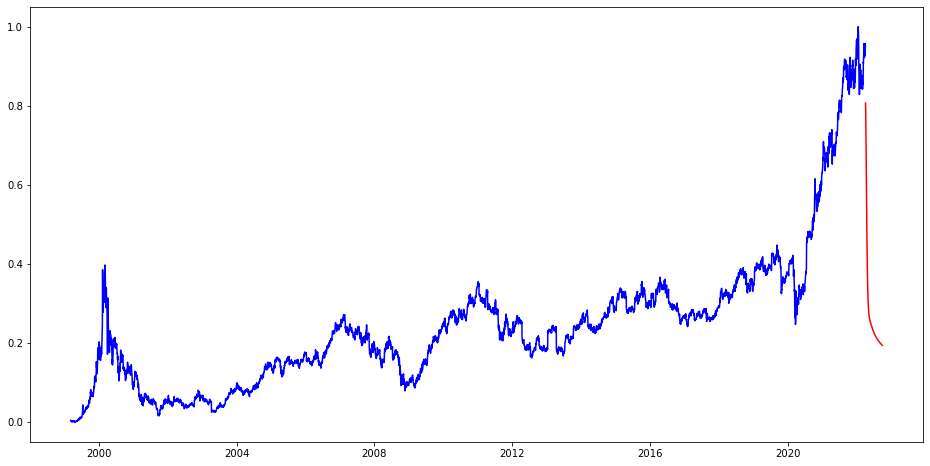

In [39]:
plt.figure(figsize=(16,8))
df3=df1.tolist()
df3.extend(lst_output)

plt.plot(df['Date'], df3[:len(df1)], color="blue")
plt.plot(datelist, df3[len(df1):], color="red")
print(type(df['Date'][0]))

In [40]:
df1

array([[0.00420027],
       [0.00404755],
       [0.00145099],
       ...,
       [0.95738025],
       [0.9519061 ],
       [0.94877805]])

In [41]:
df3=scaler.inverse_transform(df3).tolist()

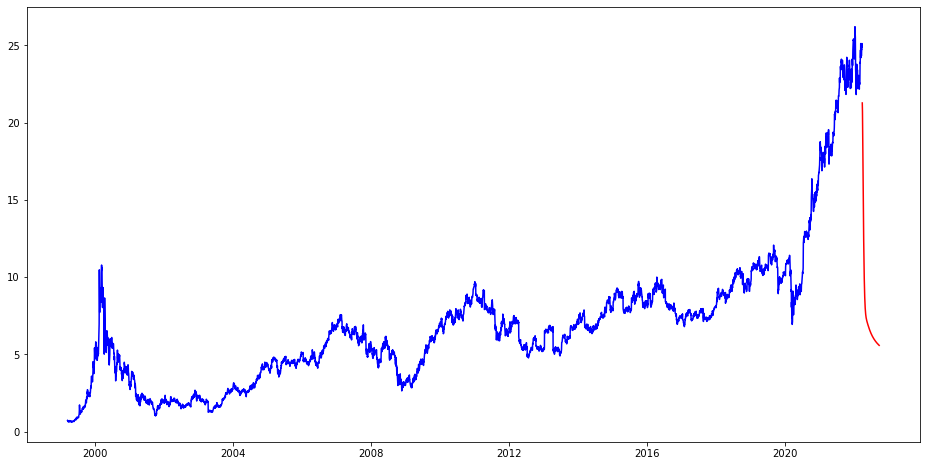

In [42]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df3[:len(df1)], color="blue")
plt.plot(datelist, df3[len(df1):], color="red")